In [1]:
import torch
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
from pathlib import Path
data_root = Path.cwd() / "pytorch-deep-learning-main" / "data"

In [4]:
import requests 
import zipfile

image_path = data_root / "pizza_steak_sushi"

# if the image folder doesnt exist download and prepare it
if image_path.is_dir():
    print(f"{image_path} dir already exists..move on")
else:
    print(f"{image_path} doesnt exist, creating one..")
    image_path.mkdir(parents=True,
                     exist_ok=True)

# download pizza steak and sushi data

with open(data_root / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("downloadind data...")
    f.write(request.content)

# unzip pizza, steak sushi data

with zipfile.ZipFile(data_root / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("unzipping data.zip...")
    zip_ref.extractall(image_path)

/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi dir already exists..move on
downloadind data...
unzipping data.zip...


## 2 becom9ing one with the data (data preparation and exploration)


In [5]:
data_root, image_path

(PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi'))

In [6]:
import os
def walk_through_dir(dir_path):
    """Walks through the dir_path returning its contents"""

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [7]:
walk_through_dir(image_path)

there are 2 directories and 0 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi
there are 3 directories and 0 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test
there are 0 directories and 58 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak
there are 0 directories and 46 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/sushi
there are 0 directories and 46 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/pizza
there are 3 directories and 0 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-mai

In [8]:
# setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/train'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test'))

In [9]:
train_dir.parent

PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi')

## 2.1 Visualizing an image

- get all of the image paths 
- pick a random image path using Pythonn's random.choice()
- Get the image class name using pathlib.Path.parent.stem
- Open the image with Py's PIL
- We'll then show the image and print thge metadata 

In [10]:
image_path

PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi')

In [11]:
next(image_path.glob("*/*/*.jpg"))

PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/413497.jpg')

random image path: /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/train/pizza/2291093.jpg
Image class: pizza
image height: 512
image width: 512


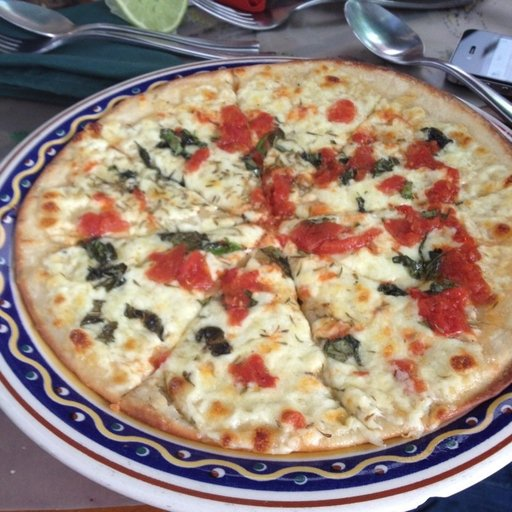

In [12]:
import random 
from PIL import Image

#set seed
#random.seed(42)
# 1. get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
#image_path_list[:5]

# 2. random imgpath

random_image_path = random.choice(image_path_list)
#print(random_image_path)

# get image class from the path same
random_image_class = random_image_path.parent.stem
#random_image_class

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metdadata
print(f"random image path: {random_image_path}")
print(f"Image class: {random_image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img


In [13]:
img.__class__ == Image.Image, type(img)

(False, PIL.JpegImagePlugin.JpegImageFile)

In [14]:
isinstance(img, Image.Image)

True

Text(0.5, 1.0, 'Image class: pizza | Image shape: (512, 512, 3)')

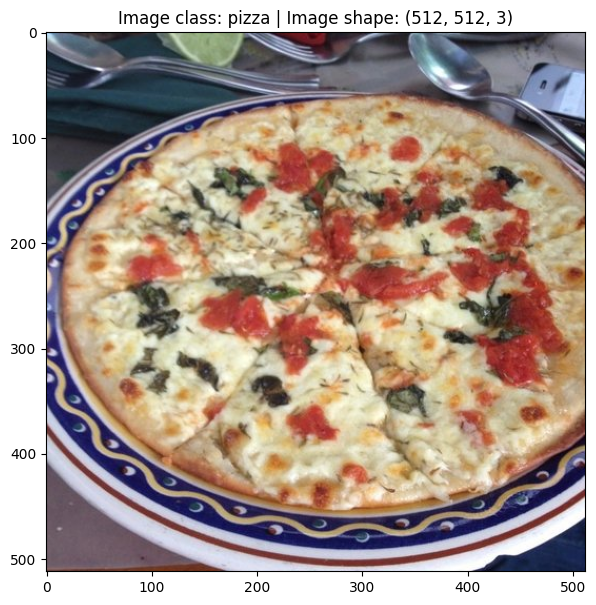

In [15]:
## try to replicate this using matp[lotlib

import numpy as np
import matplotlib.pyplot as plt

# turning the image into an np.array()
img_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {random_image_class} | Image shape: {img_as_array.shape}")

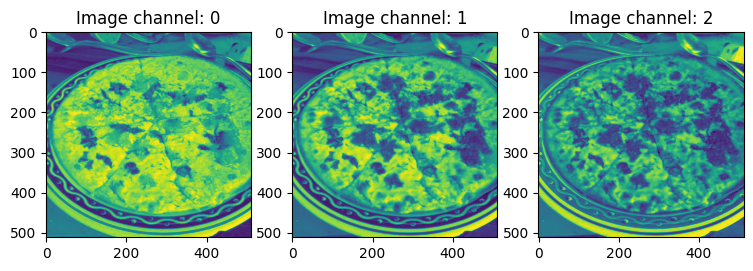

In [16]:
plt.figure(figsize=(9, 9))
color_channels = 3
for channel in range(color_channels):
    plt.subplot(1, 3, channel+1)
    plt.imshow(img_as_array[:,:,channel])
    plt.title(f"Image channel: {channel}")

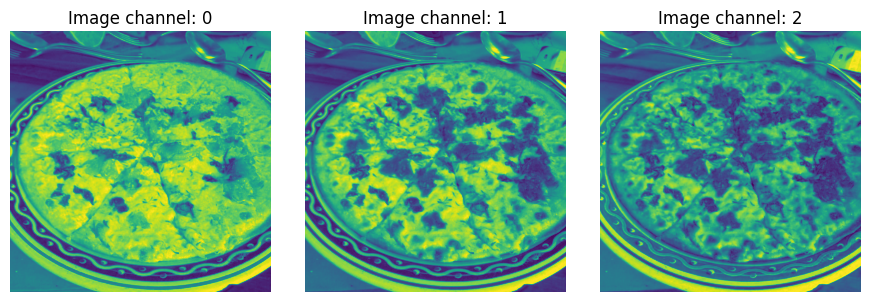

In [17]:
import matplotlib.pyplot as plt

color_channels = 3
fig, axes = plt.subplots(1, color_channels, figsize=(9, 3))

for i in range(color_channels):
    axes[i].imshow(img_as_array[:, :, i])
    axes[i].set_title(f"Image channel: {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


# 3. transforming data 
Before we can use our image data with PyTorch
1. Turn your data into tensors 
2. turn it into `torch.utils.data.Dataset`and subsequently a `torch.utils.data.DataLoader`

In [18]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 transforming data with `torchvision.transforms`

In [19]:
# write a transform for image
data_transform = transforms.Compose([
# resize image to 64*64
transforms.Resize(size=(64, 64)),
# flip the images randomly on the horizontal axis
transforms.RandomHorizontalFlip(p=0.5),
# turn the image into a tensor
transforms.ToTensor() ## converts a PIL or numpy image array to a torch.tensor
])

In [20]:
data_transform(img=img).shape, data_transform(img=img).dtype

(torch.Size([3, 64, 64]), torch.float32)

In [21]:
image_path_list[:5]

[PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/413497.jpg'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/2246332.jpg'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/2475366.jpg'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/1982192.jpg'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/2353677.jpg')]

In [22]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    """
    Selects random images from a path of images and loads/transforms
    them then plots the original vs the transformed version
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"original Size: {f.size}")
            ax[0].axis(False)

            # transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Trabnsformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

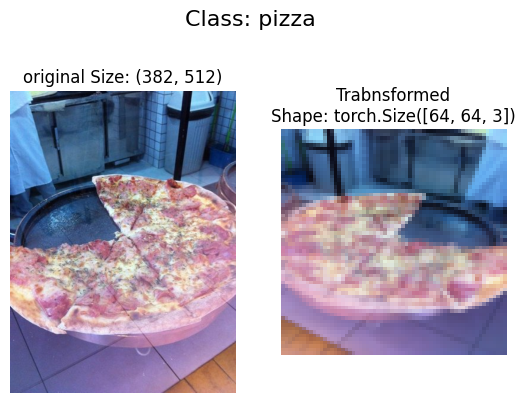

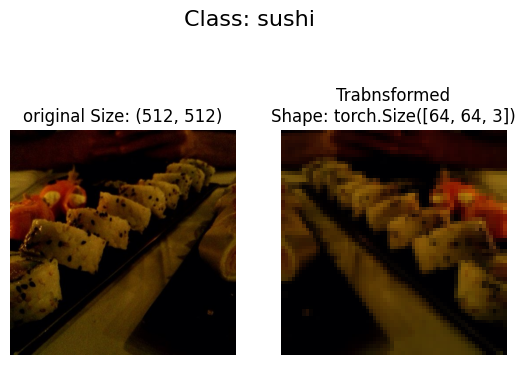

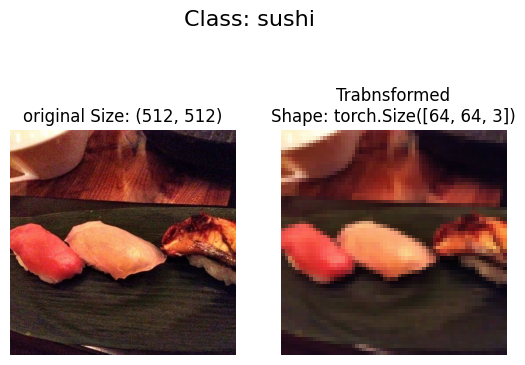

In [23]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform)

## 4 Option 1: Loading image using ImageFolder
We can load image classification data using `torchvision.datasets.ImageFolder`

In [24]:
train_dir, test_dir

(PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/train'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test'))

In [25]:
# use ImageFolder to create datsets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [26]:
train_data[0][0].shape

torch.Size([3, 64, 64])

In [27]:
train_data.targets[-5:], train_data.classes, train_data.class_to_idx

([2, 2, 2, 2, 2],
 ['pizza', 'steak', 'sushi'],
 {'pizza': 0, 'steak': 1, 'sushi': 2})

In [28]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_names, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [29]:
len(train_data), len(test_data)

(450, 150)

In [30]:
img, label= train_data[0]
#img.shape, label
print(f"Image tensor: \n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label:: {label}")
print(f"label datatype: {type(label)}")

Image tensor: 
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

In [31]:
class_names[label]

'pizza'

Original shape: torch.Size([3, 64, 64]) -> [color channels, height, width]
image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


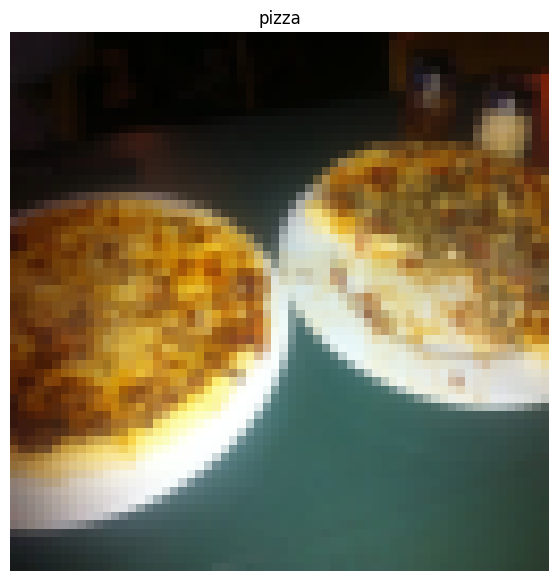

In [32]:
# Reaarange the order dimensions
img_permute = img.permute(1, 2, 0)

# print out different shape
print(f"Original shape: {img.shape} -> [color channels, height, width]")
print(f"image permute: {img_permute.shape} -> [height, width, color_channels]")

# plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.title(class_names[label])
plt.axis(False);


### 4.3 turn datasets into dataloaders

A `DataLoader` is going to help us turn our `Dataset`into iterables, and we can customize the `batch_size` so our model can look at data in batches

In [33]:
import os
os.cpu_count()

8

In [34]:
import os
# turn train and test dataset into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 8

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1, #os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1, #os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x15511be80>,
 <torch.utils.data.dataloader.DataLoader at 0x15511b2e0>)

In [35]:
len(train_dataloader), len(test_dataloader)

(57, 19)

In [36]:
img, label = next(iter(train_dataloader))

## batch size is now 1 
print(f"image shape: {img.shape} -> [batch-size, color_channels, H, W]")
print(f"Label shape: {label.shape}")
label

image shape: torch.Size([8, 3, 64, 64]) -> [batch-size, color_channels, H, W]
Label shape: torch.Size([8])


tensor([1, 0, 2, 2, 2, 0, 2, 1])

## 5 Option 2: Loading image Data with a Custom `Dataset`

1. Want to be able to load image from a file
2. Want to be able to get classess as dictionary from the Dataset

ProsL
* Can create a `Dataset`out of almost anything 
* Not limited to PyTorch pre-build `Dataset`functions

Cons:
* Even though you could create `Dataset`out of almost anuything - doesn mean it will work well / as needed
* using a custom `Dataset` means writing more code which means more potential performance issues.

In [37]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [38]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [39]:
train_data.idx_to_class = {item:key for key, item in train_data.class_to_idx.items()}
train_data.idx_to_class

{0: 'pizza', 1: 'steak', 2: 'sushi'}

### 5.1 Creating a helper func to get class names

We want a func to:
1. Get the class names using òs.scandir()`to traverse a target dictionary (ideally the directory is in standard immage classification format)
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure)
3. Turn the class names into a dict and a list and return them

In [40]:
[(entry.name, entry.__class__) for entry in list(os.scandir(train_dir))]

[('steak', posix.DirEntry),
 ('sushi', posix.DirEntry),
 ('pizza', posix.DirEntry)]

In [41]:
# setupo path for target directory
target_directory = train_dir
print(f"target dir: {target_directory}")

# get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(train_dir))])
class_names_found

target dir: /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [42]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """FInd the class folder names in a target directory"""
    # 1. Get class names by scanning the trarget director
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir() )

    # 2. raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldmnt find any classes in {directory}..please check file structure")

    # 3. Create a dictionary of index lables 
    class_to_idx = {class_name:idx for idx, class_name in enumerate(classes)}

    return classes, class_to_idx




In [43]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

TO create our own custom dataset, we want to:

1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target diectory, (the dir to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
    * paths - paths of our images
    * transform - the transforms we'd like to use
    * classes - a list of the target classes
    * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()` this function will open an image
5. override the `__len()__` method to return the length of our dataset
6. Overwriite the `__getitem()__` method to return a gien sample when passed an index


In [44]:
image_path_list[0].parent.stem

'steak'

In [45]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass Datasets
class ImageFolderCustom(Dataset):
    # 2. Initialise custom dataset
    def __init__(self,
                 targ_dir: str,
                 transform=None):
        # 3. create class attributes
        self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
        # setup transforms
        self.transform = transform
        # create class and class_to_idx
        self.classes, self.class_to_idx = find_classes(targ_dir)
    
    # 4. Create a func to load images
    def load_image(self, index: int) -> Image.Image:
        """Opens an image via a path anbd returns it."""
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # 5. Override __len()__
    def __len__(self) -> int:
        """Returns the total num of samples."""
        return len(self.paths)
    
    # 6. override __getitem__()
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """return one sample - (X, y)"""
        img = self.load_image(index)
        class_name =  self.paths[index].parent.stem  # expects path in the format: data_folder/class/image.jpg
        class_idx = self.class_to_idx[class_name]

        ## transform if necessary
        if self.transform:
            return self.transform(img), class_idx        
        else:
            return img, class_idx

In [46]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [47]:
# test the ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x15511b310>,
 <__main__.ImageFolderCustom at 0x155091880>)

In [48]:
len(train_data_custom), len(test_data_custom)

(450, 150)

In [49]:
len(train_data), len(test_data)

(450, 150)

In [50]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [51]:
# check for 
train_data.classes == train_data_custom.classes

True

### 5.3 Create a function to display random images

1. take in a `Dataset` and a numbver of other parameters - class names and how many images to visualise.
2. TO prevent the display getting out of hand, lets cap the number of images to see at 10.
3. Set the random seed for reporoducibility
4. get a list off random sample indexed from the target dataset
5. Setup a matplotlib plot
6. Loop through the random sample images and plot them with matplotlibe
7. makse sure the dimesnions of our imagges line up with matplotlib [(HWC)]

In [52]:
# 1. Create a function take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    # 2. Adjust display if n is too high
    if n > 10:
        n=10
        display_shape = False
        print(f"For display purposes, n shouldnt be larger than 10, setting to 10 and removing shjape display")
    # 3. set the see
    if seed:
        random.seed(seed)
    # 4. get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n) 
    # 5. Setup plot
    plt.figure(figsize=(16, 8))
    # 6. Loop throgh random indexes and plot them with matplotlin
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample]
        # 7. Adjust tensor dimensions for plots
        targ_img_adjust = targ_image.permute(1, 2, 0)

        # plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_img_adjust)
        plt.axis("off")
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title += f"\n shape: {targ_img_adjust.shape}"
        plt.title(title)


In [53]:
random.sample(range(len(train_data)), k=10)

[111, 29, 240, 132, 279, 148, 319, 380, 334, 40]

In [54]:
train_data[0][0].permute(1, 2, 0).shape

torch.Size([64, 64, 3])

In [55]:
train_data.classes

['pizza', 'steak', 'sushi']

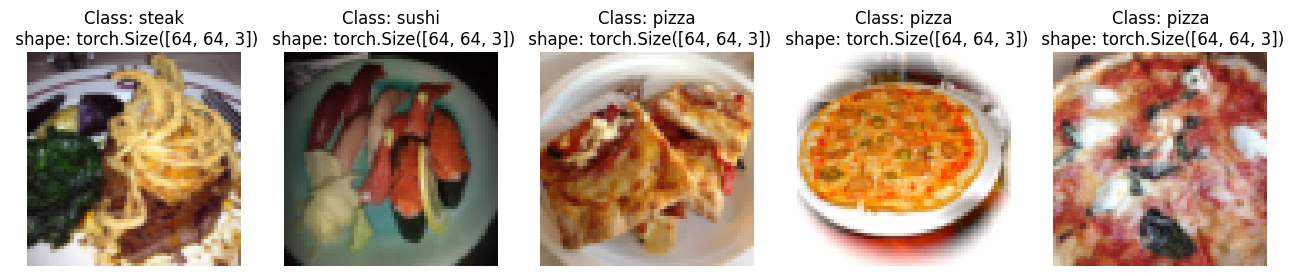

In [56]:
display_random_images(train_data, 
                      classes=class_names,
                      n=5,
                      seed=None)

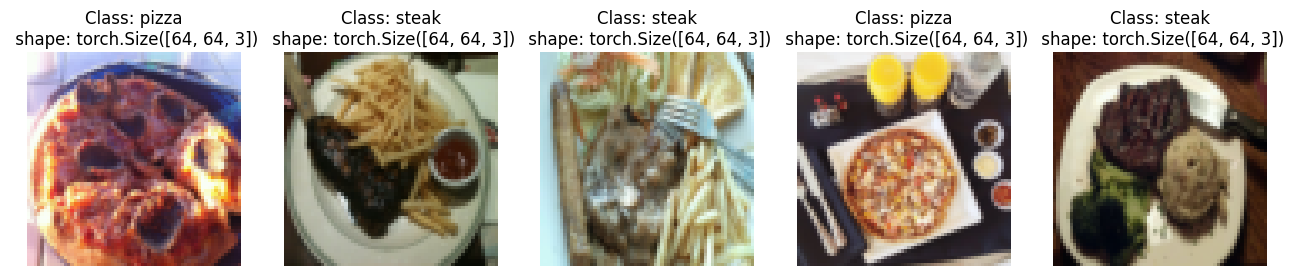

In [57]:
# display random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      classes=train_data_custom.classes,
                      n=5,
                      seed=42)

### 5.4 Turn custom loaded images into DataLoader's

In [58]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=0)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x154ef40a0>,
 <torch.utils.data.dataloader.DataLoader at 0x155084a30>)

In [59]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape, label_custom

(torch.Size([32, 3, 64, 64]),
 torch.Size([32]),
 tensor([0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0,
         1, 0, 0, 0, 2, 1, 2, 1]))

## 6 Data augmentation

many kinds of augmentation - now looking at - `TrivialAugment`

In [60]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [61]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/413497.jpg'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/2246332.jpg'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/2475366.jpg'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/1982192.jpg'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/2353677.jpg'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak/1166047.jpg'),
 PosixPath('/Users/sauravkris

In [62]:
walk_through_dir(data_root)

there are 1 directories and 3 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data
there are 2 directories and 0 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi
there are 3 directories and 0 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test
there are 0 directories and 58 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/steak
there are 0 directories and 46 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test/sushi
there are 0 directories and 46 images in /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/pizza_steak_sushi/test

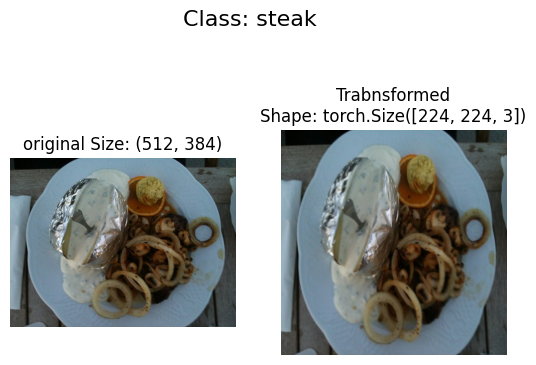

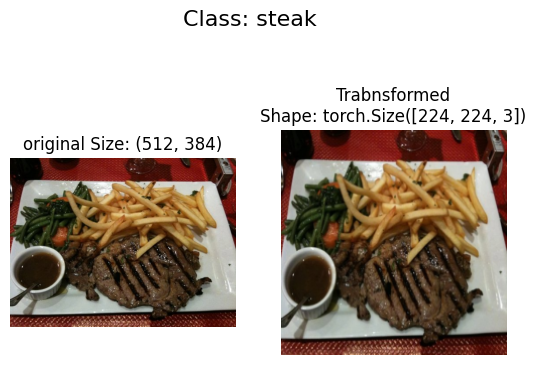

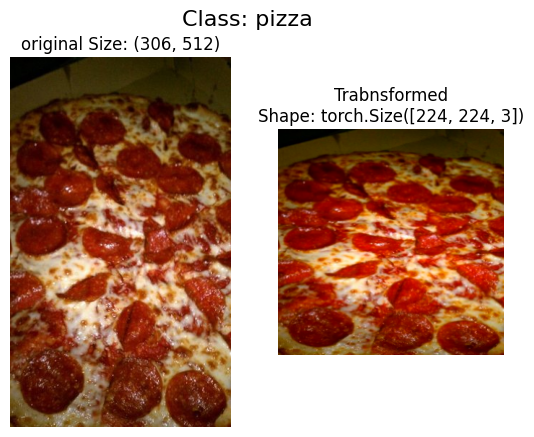

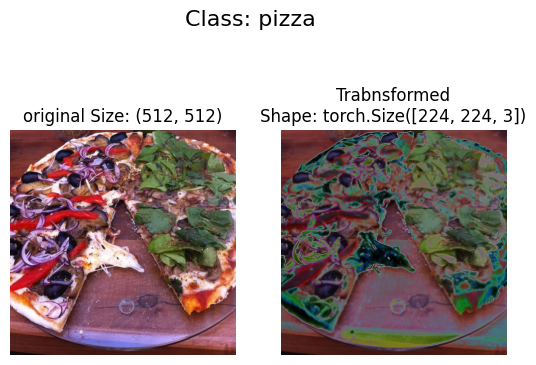

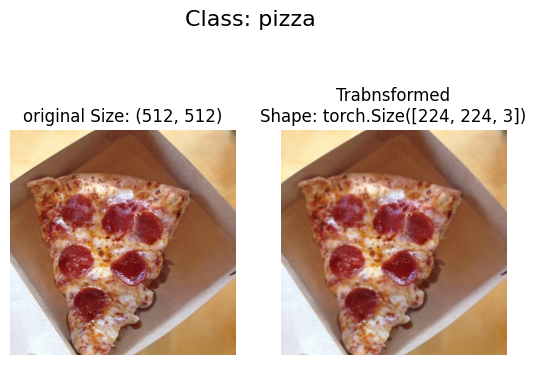

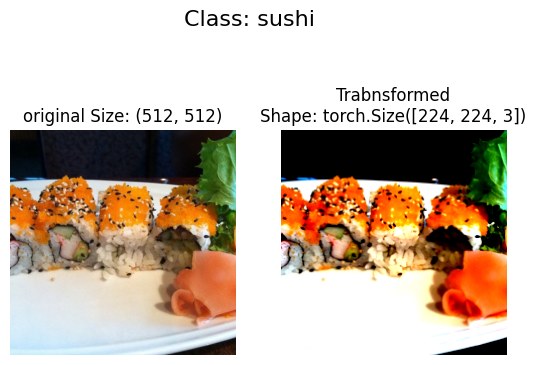

In [63]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=6
)

## Build baseline model 0: TinyVGG without augmentation


### 7.1 Creating transforms and loaded data for Model 0

In [64]:
simple_tranform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [65]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_tranform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_tranform)

# 2. Turn datsets into DataLoaders
import os
from torch.utils.data import DataLoader

## setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERs = os.cpu_count()

# create DataLoaders
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERs)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERs)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x155414f10>,
 <torch.utils.data.dataloader.DataLoader at 0x149efdac0>)

### 7.2 Create TinyVGG model class

In [66]:
class TinyVGG(nn.Module):
    """
    TinyVGG architecture
    """
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        #print(x.shape)
        x = self.conv_block2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [67]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [68]:
model_0(train_data_simple[0][0].unsqueeze(0))

tensor([[ 0.0170, -0.0053,  0.0128]], grad_fn=<AddmmBackward0>)

### 7.4 using `torchinfo`

In [69]:
# install  torchinfo

try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## 7.5 Crreate train and test step functions

* `train_step` - takes in a model and a datalopader and trains the model on the dataloader
* `train_step`- takis in a model and dataloader and evailuates the model on the dataloader


In [70]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    model.train()

    # setup train loss and acc
    train_loss, train_acc = 0.0, 0.0

    # loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # send dat ot the target device
        X, y = X.to(device), y.to(device)

        # 1. forward pass
        y_pred = model(X)

        # 2. calc loss 
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. backprop
        loss.backward()

        # 5. optimizeeer step
        optimizer.step()

        # calc accuracy metric
        y_pred_class = torch.softmax(y_pred, dim=1).argmax(dim=1)
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc




In [71]:
# create test_step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    model.eval()

    test_loss, test_acc = 0.0, 0.0

    with torch.inference_mode():
        # send data to target device
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)


            # 1. fwd pass
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()


            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)


    # adjust to get for per batch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    return test_loss, test_acc


## 7.6 Creating a `train()` func to combine `train_step`and `test_step` 

In [72]:
# create train func

from tqdm.auto import tqdm

# 1. Create a train func taking various model params - optimizer, loss, dataloaders, device

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int = 5,
          device=device):
    
    # 2. Create empty results dict
    results = {'train_loss': [],
               'train_acc': [],
               'test_loss': [],
               'test_acc': []}
    
    # 3. loop throufh the training and tesing steps for a number 
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch} \n--------")
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)
        # 4. print progress
        print(f"train loss: {train_loss} | train acc: {train_acc} | test loss: {test_loss} | test acc: {test_acc}")

        # 5. Update the results dict
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results



### 7.7 train and evaluate model 0

In [73]:
torch.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# star the timer
from timeit import default_timer as timer

start_time = timer()

# train model0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()

print(f"total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
--------
train loss: 1.1046746730804444 | train acc: 0.3145833333333333 | test loss: 1.0972347259521484 | test acc: 0.2875
Epoch: 1 
--------
train loss: 1.0886221726735432 | train acc: 0.4 | test loss: 1.073910403251648 | test acc: 0.42897727272727276
Epoch: 2 
--------
train loss: 1.0554035504659016 | train acc: 0.49375 | test loss: 1.0406286597251893 | test acc: 0.4727272727272728
Epoch: 3 
--------
train loss: 0.981895403067271 | train acc: 0.5291666666666667 | test loss: 0.9784481406211853 | test acc: 0.5329545454545455
Epoch: 4 
--------
train loss: 0.98175235191981 | train acc: 0.4791666666666667 | test loss: 0.9347113490104675 | test acc: 0.5568181818181819
total training time: 357.028 seconds


In [77]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

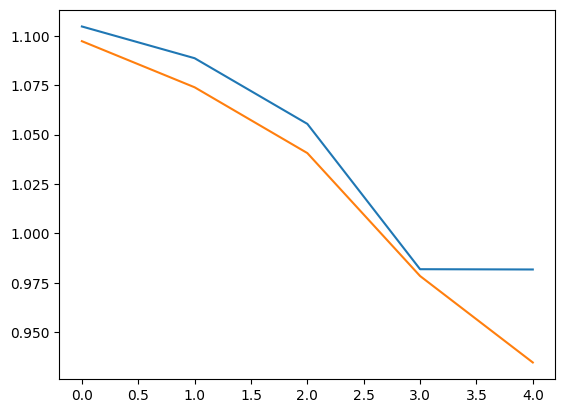

In [78]:
plt.plot(model_0_results['train_loss'])
plt.plot(model_0_results["test_loss"])


In [79]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plot training curves of a results dict"""

    # Get loss values of the results dic
    loss = results['train_loss']
    test_loss = results['test_loss']

    # acc
    acc = results['train_acc']
    test_acc = results['test_acc']

    #epochs
    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    # plot the loss

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train loss")
    plt.plot(epochs, test_loss, label="test loss")
    plt.title("loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, label='train accuracy')
    plt.plot(epochs, test_acc, label="test accuracy")
    plt.title("accuracy")
    plt.xlabel("Epochs")
    plt.legend();

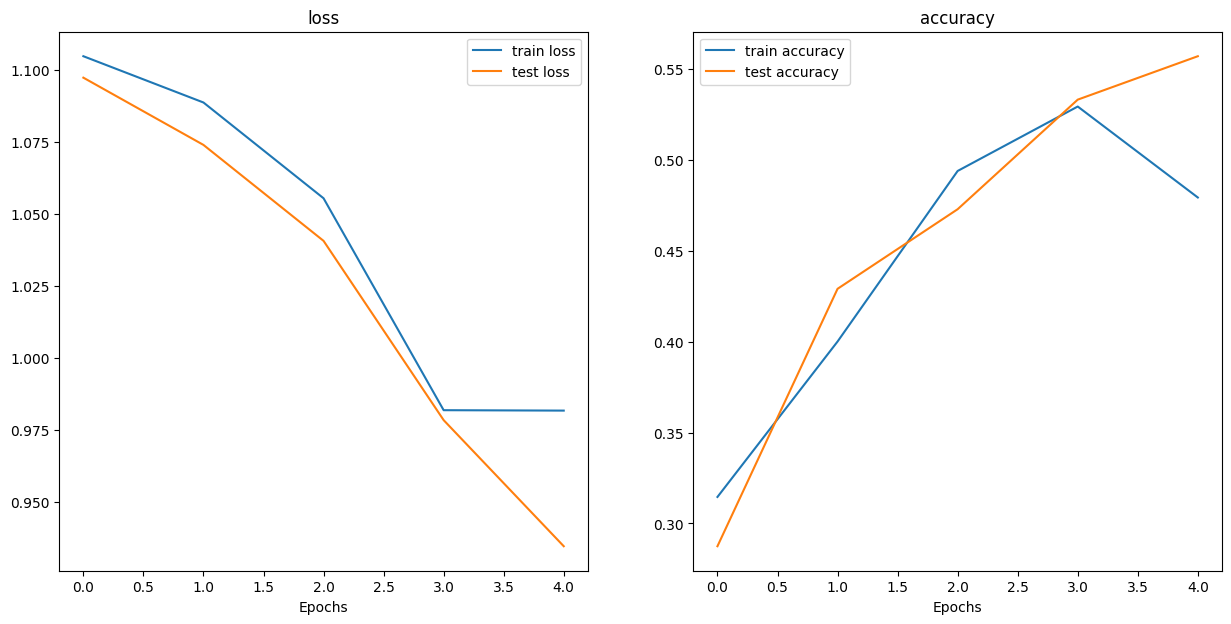

In [80]:
plot_loss_curves(model_0_results)

## 9 Model 1: TinyVGG with Data Augmentation

- same model as beofre but with some data augmentation

### 9.1 Create transform with Data Augmentation

In [81]:
# dataa augmentaion - Trivial AUgment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])


### 9.2 Create train and test `Dataset`and `DataLoader`with data augmentation

In [83]:
# turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                           transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)


In [86]:
# Turn datsets into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()


torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple



(<torch.utils.data.dataloader.DataLoader at 0x155b993d0>,
 <torch.utils.data.dataloader.DataLoader at 0x1042f0760>)

### 9.3 Construnct and train Model 1

- same model architecture and only changiung the data - by augmenting data


In [87]:
# Create model 1 nd send iot to the tareget device
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# Set random seeds
torch.manual_seed(42)

# Set the epochs
NUM_EPOCHS = 5

# setup the loss 
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

from timeit import default_timer as timer

start_time = timer()

# train model 1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
--------
train loss: 1.1023372570673624 | train acc: 0.3125 | test loss: 1.1020841360092164 | test acc: 0.2875
Epoch: 1 
--------
train loss: 1.0910075187683106 | train acc: 0.4166666666666667 | test loss: 1.077943992614746 | test acc: 0.41875
Epoch: 2 
--------
train loss: 1.0761005957921346 | train acc: 0.43333333333333335 | test loss: 1.0329062700271607 | test acc: 0.4903409090909091
Epoch: 3 
--------
train loss: 1.0478033224741619 | train acc: 0.4583333333333333 | test loss: 1.0013193964958191 | test acc: 0.525
Epoch: 4 
--------
train loss: 1.0275241335233052 | train acc: 0.47708333333333336 | test loss: 0.9961514115333557 | test acc: 0.4142045454545455


TypeError: unsupported operand type(s) for -: 'float' and 'builtin_function_or_method'

In [ ]:
print(f"Total training time for model 1: {end_time -start_time:.3f} seconds")

TypeError: unsupported operand type(s) for -: 'float' and 'builtin_function_or_method'

### 9.4 Plot loss curves - Model 1

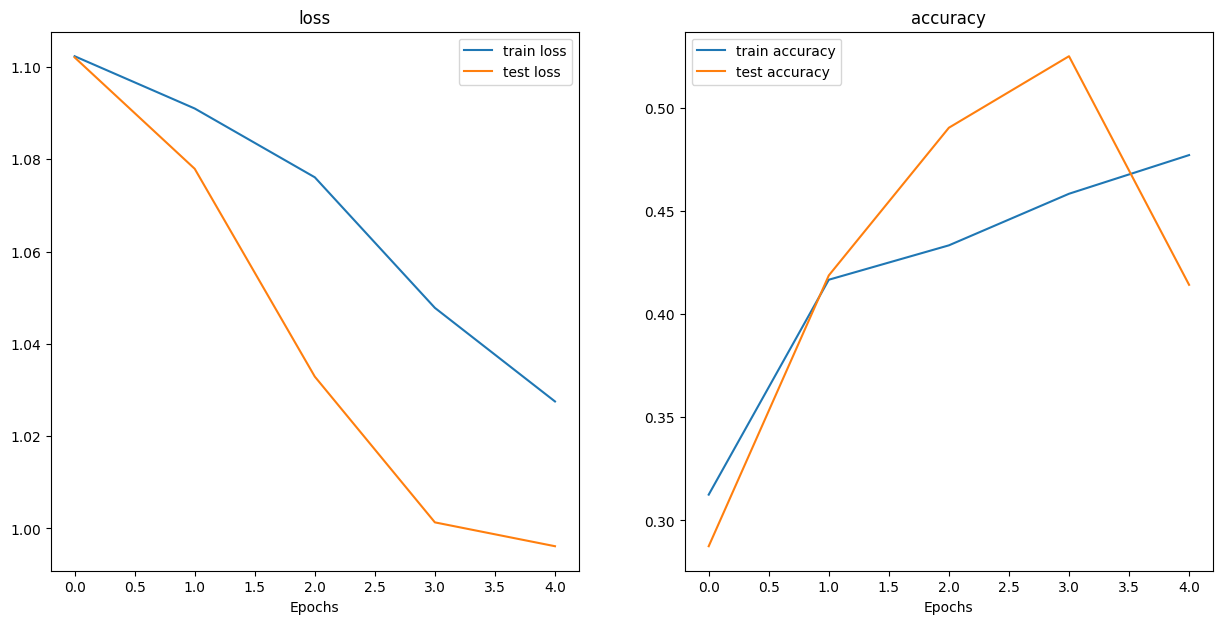

In [90]:
plot_loss_curves(model_1_results)

## 10 compare model results

In [89]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.104675   0.314583   1.097235  0.287500
1    1.088622   0.400000   1.073910  0.428977
2    1.055404   0.493750   1.040629  0.472727
3    0.981895   0.529167   0.978448  0.532955
4    0.981752   0.479167   0.934711  0.556818

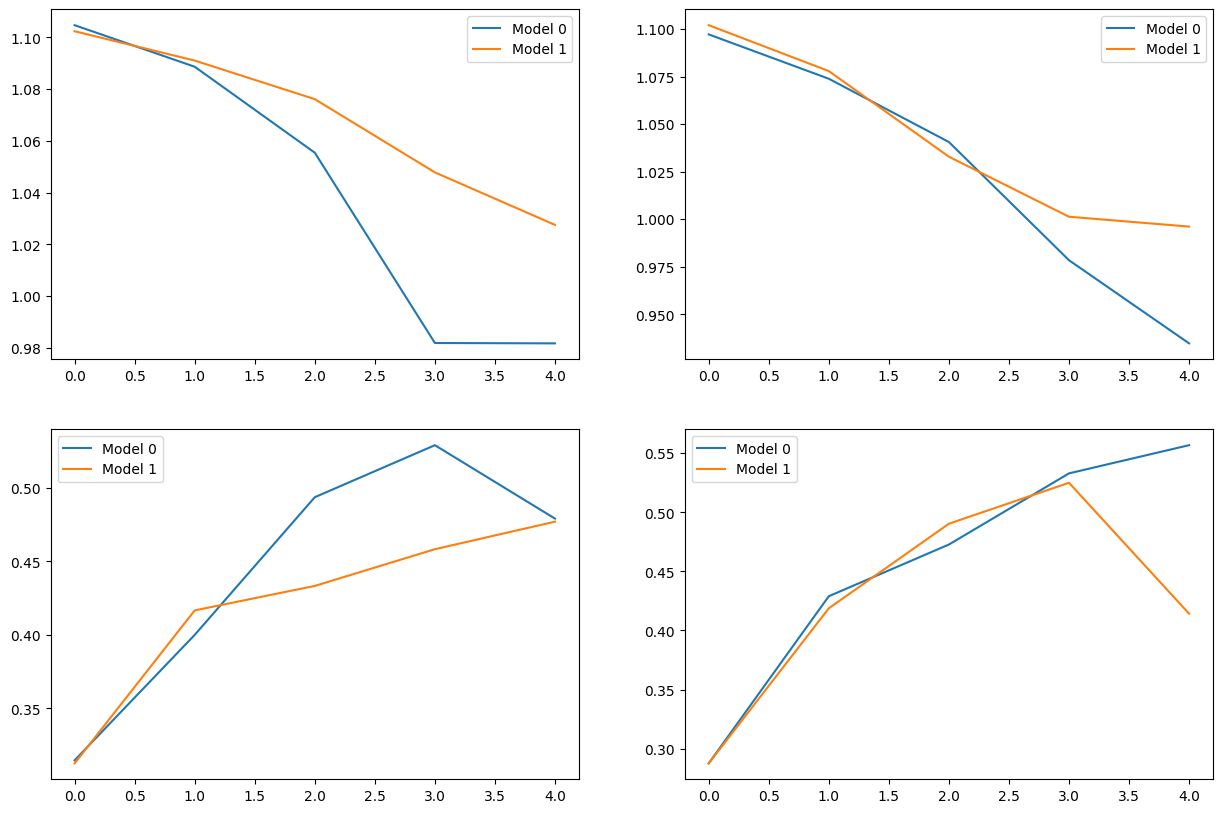

In [96]:
# setup a plot
plt.figure(figsize=(15, 10))

# get the num of epochs
epochs = range(len(model_0_df))

# plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.legend()

# plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.legend();

# plot train acc
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.legend()

# plot test acc
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.legend()



## 11. making a prediction on a custom image



In [99]:
# downlaod a custom inage
import requests

# setup custom image path
custom_img_path = data_root / "04-pizza-dad.jpeg"

#Download the image if it doesnt already exist
if not custom_img_path.is_file():
    with open(custom_img_path, "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/04-pizza-dad.jpeg")
        print(f"downloading {custom_img_path}")
        f.write(request.content)
else:
    print(f"{custom_img_path} already existts move one")

/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/04-pizza-dad.jpeg already existts move one


In [100]:
custom_img_path.is_file()

True

### 11. Loading in a custom image with PyTorch

- mke sure same datatype
- same shape
- on same device

Using `read_image*()`


In [101]:
custom_img_path

PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/data/04-pizza-dad.jpeg')

In [102]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_img_path))

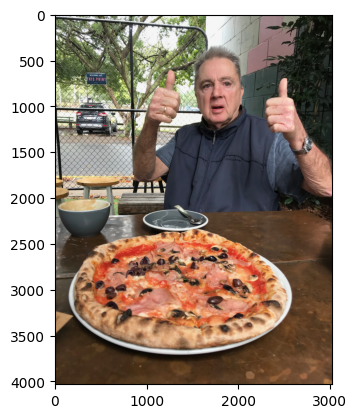

In [104]:
plt.imshow(custom_image_uint8.permute(1, 2, 0));

In [105]:
print(f"custom image tensor: \n {custom_image_uint8}")
print(f"custom image shape: {custom_image_uint8.shape}")
print(f"custom image type: {custom_image_uint8.dtype}")

custom image tensor: 
 tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
custom image shape: torch.Size([3, 4032, 3024])
custom image typ

### 11.2 making a prediction on a custom inage with a trained PyTorch model

In [ ]:
# try to make a prediction on a image in uint8 fformat
model_1.eval()

with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [111]:
custom_image = torchvision.io.read_image(str(custom_img_path)).type(torch.float32) / 255.

In [109]:
# try to make a prediction on a image in uint8 fformat
model_1.eval()

with torch.inference_mode():
    model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x756765 and 1690x3)

In [112]:
custom_image

tensor([[[0.6039, 0.6863, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6549, 0.7059,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6706,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7412, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7098, 0.7608,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7255,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4157, 0.4078, 0.4000],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4118, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4588, 0.5412, 0.5686,  ..., 0.0667, 0.0549, 0.0392],
         [0.4275, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

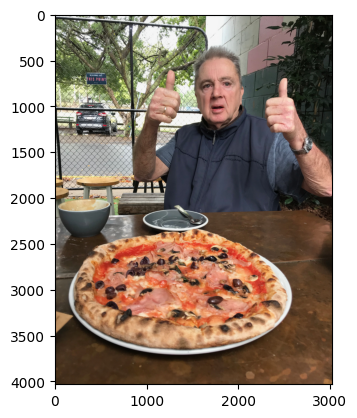

In [115]:
plt.imshow(custom_image.permute(1, 2, 0))

In [116]:
custom_img_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

# transform target image
custom_image_transformed = custom_img_transform(custom_image)

# prrint shapes
print(f" og shape: {custom_image.shape}")
print(f"transformed shape: {custom_image_transformed.shape}")

 og shape: torch.Size([3, 4032, 3024])
transformed shape: torch.Size([3, 64, 64])


/opt/anaconda3/envs/d2l/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


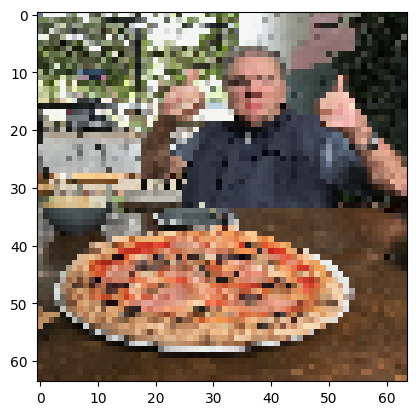

In [119]:
plt.imshow(custom_image_transformed.permute(1, 2, 0));

In [ ]:
model_1.eval() ## will error - nop batch size

with torch.inference_mode():
    custom_img_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [123]:
custom_image_transformed.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [125]:
model_1.eval() 

with torch.inference_mode():
    custom_img_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_img_pred

tensor([[-0.0492, -0.1403,  0.0083]])

In [126]:
custom_pred_label = custom_img_pred.argmax(dim=1)
custom_pred_label

tensor([2])

In [136]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
  """Makes a prediction on a target image with a trained model and plots the image and prediction."""
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0, 1]
  target_image /= 255.

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on the target device
  model.to(device)

  # Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image (this is the batch dimension, e.g. our model will predict on batches of 1x image)
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image.to(device)) # make sure the target image is on the right device

  # Convert logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert predction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # Plot the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and rearrange shape to be HWC
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False);

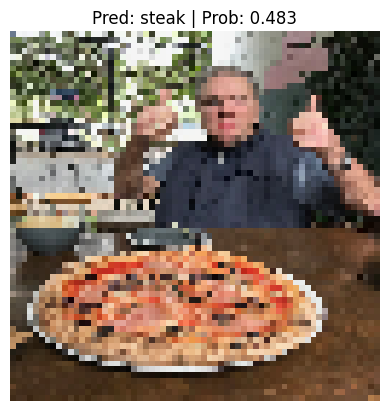

In [137]:
# Pred on our custom image
pred_and_plot_image(model=model_0,
                    image_path=custom_img_path,
                    class_names=class_names,
                    transform=custom_img_transform,
                    device=device)